# Visualizing Earnings Based On College Majors

<br>

**Exploring the pandas plotting functionality along with the Jupyter notebook to explore different types of visualizations.**

![Students](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/5107/2020/08/16232334/people-2562626_1920.jpg)


The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

<br>

The aim of the study is focused on the answer to the following questions through the use of graphical tools:


- **Do students in more popular majors make more money**? 


- **How many majors are predominantly male? and female**?


- **Which category of majors have the most students**?


* * *

### Data dictionary


<table>
<thead>
<tr>
<th>Header</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Rank</code></td>
<td>Rank by median earnings</td>
</tr>
<tr>
<td><code>Major_code</code></td>
<td>Major code, FO1DP in ACS PUMS</td>
</tr>
<tr>
<td><code>Major</code></td>
<td>Major description</td>
</tr>
<tr>
<td><code>Major_category</code></td>
<td>Category of major from Carnevale et al</td>
</tr>
<tr>
<td><code>Total</code></td>
<td>Total number of people with major</td>
</tr>
<tr>
<td><code>Sample_size</code></td>
<td>Sample size (unweighted) of full-time, year-round ONLY (used for earnings)</td>
</tr>
<tr>
<td><code>Men</code></td>
<td>Male graduates</td>
</tr>
<tr>
<td><code>Women</code></td>
<td>Female graduates</td>
</tr>
<tr>
<td><code>ShareWomen</code></td>
<td>Women as share of total</td>
</tr>
<tr>
<td><code>Employed</code></td>
<td>Number employed (ESR == 1 or 2)</td>
</tr>
<tr>
<td><code>Full_time</code></td>
<td>Employed 35 hours or more</td>
</tr>
<tr>
<td><code>Part_time</code></td>
<td>Employed less than 35 hours</td>
</tr>
<tr>
<td><code>Full_time_year_round</code></td>
<td>Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP &gt;= 35)</td>
</tr>
<tr>
<td><code>Unemployed</code></td>
<td>Number unemployed (ESR == 3)</td>
</tr>
<tr>
<td><code>Unemployment_rate</code></td>
<td>Unemployed / (Unemployed + Employed)</td>
</tr>
<tr>
<td><code>Median</code></td>
<td>Median earnings of full-time, year-round workers</td>
</tr>
<tr>
<td><code>P25th</code></td>
<td>25th percentile of earnings</td>
</tr>
<tr>
<td><code>P75th</code></td>
<td>75th percentile of earnings</td>
</tr>
<tr>
<td><code>College_jobs</code></td>
<td>Number with job requiring a college degree</td>
</tr>
<tr>
<td><code>Non_college_jobs</code></td>
<td>Number with job not requiring a college degree</td>
</tr>
<tr>
<td><code>Low_wage_jobs</code></td>
<td>Number in low-wage service jobs</td>
</tr>
</tbody>
</table>

* * *

### Load data.

Let's import the libraries and explore the dataset:

In [1]:
import chardet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

#### Checking with `file` the codification format (GNU/Linux tool).

https://www.man7.org/linux/man-pages/man1/file.1.html

In [2]:
! file -k csv/recent-grads.csv

csv/recent-grads.csv: CSV text\012- , ASCII text


In [3]:
! file -i csv/recent-grads.csv

csv/recent-grads.csv: application/csv; charset=us-ascii


#### Checking with `chardet`: The Universal Character Encoding Detector.

https://pypi.org/project/chardet/

In [4]:
with open("csv/recent-grads.csv", "rb") as file:
    print(chardet.detect(file.read()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


- We know what the format of the document is ok, so lets proceed to load it.

In [5]:
recent_grads = pd.read_csv("csv/recent-grads.csv", encoding="ascii")

### Data Exploration.

In [6]:
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

- The dataset is composed of 21 columns


- Two columns are of type categories; `Major_category` and `Major`.


- Four of the columns are missing a piece of data.

#### Number of general `Major_category`:

In [8]:
total_major_categories = len(recent_grads['Major_category'].unique())
total_major_categories 

16

In [9]:
recent_grads['Major_category'].unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Agriculture & Natural Resources',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Humanities & Liberal Arts', 'Psychology & Social Work',
       'Communications & Journalism', 'Interdisciplinary'], dtype=object)

#### `Major_category`:

In [10]:
major_categories = len(recent_grads['Major'].unique())
major_categories

173

In [11]:
recent_grads['Major'].unique()[:10] # just a sample of ten.

array(['PETROLEUM ENGINEERING', 'MINING AND MINERAL ENGINEERING',
       'METALLURGICAL ENGINEERING',
       'NAVAL ARCHITECTURE AND MARINE ENGINEERING',
       'CHEMICAL ENGINEERING', 'NUCLEAR ENGINEERING', 'ACTUARIAL SCIENCE',
       'ASTRONOMY AND ASTROPHYSICS', 'MECHANICAL ENGINEERING',
       'ELECTRICAL ENGINEERING'], dtype=object)

***
### Cleaning Data

#### Columns with missing data.

In [12]:
boolean_filer = recent_grads['Total'].isnull()
recent_grads[boolean_filer]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [13]:
recent_grads[boolean_filer]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


#### 3 nulls in just one row!


At this point we can try to:

- recover by some techniques

- remove it.



This time we are going to **remove it**.

In [14]:
recent_grads.dropna(axis=0, inplace=True)

***

#### Let's see the appearance once the row is deleted.

In [15]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

- The dataset appears clean.

In [16]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


#### Quick view thru `describe` method:



- The amount of women is higher than men.


- At least there is a major where women do not work.


- Up to 25% of all majors are mainly men, the rest are women.

<br>

*major where women do not work* 🤔

In [17]:
recent_grads[recent_grads['Women'] == 0 ]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0


***

## Data and Scatter plots.


Scatter plots are used to display relationships between two continuous variables. For correlation, scatter plots help show the strength of the linear relationship between two variables.

<br>


Pandas has the constructor `DataFrame` and a wide variety of possible representations based on the data we are working  such as: 

#### `kind` types.

- `‘line’` : line plot (default).

- `‘bar’` : vertical bar plot.

- `‘barh’` : horizontal bar plot.

- `‘hist’` : histogram.

- `‘box’` : boxplot.

- `‘kde’` : Kernel Density Estimation plot.

- `‘density’` : same as ‘kde’.

- `‘area’` : area plot.

- `‘pie’` : pie plot.

- `‘scatter’` : scatter plot (DataFrame only).

- `‘hexbin’` : hexbin plot (DataFrame only).

<br>


Through the **scatter plot** we will explore how the following attributes are correlated.

<br>

***

### - `Sample_size` vs. `Employed`

- `Sample_size` - Sample size (unweighted) of full-time.

- `Employed` - Median earnings of full-time, year-round workers.

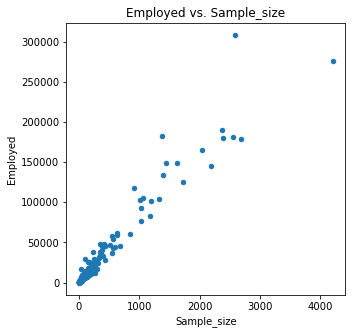

In [18]:
ax = recent_grads.plot(x='Sample_size',
                       y='Employed',
                       kind='scatter',
                      title ='Employed vs. Sample_size',
                      figsize = (5,5))
plt.show()

- There is a positive correlation between `Sample_size` and `Employed`.
<br>

***

### - `Sample_size` vs. `Median`

- `Sample_size` - Sample size (unweighted) of full-time.

- `Median` - Median salary of full-time, year-round workers.

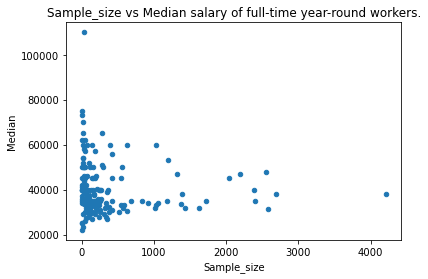

In [19]:
recent_grads.plot(x='Sample_size',
                  y='Median',
                  kind='scatter',
                  title='Sample_size vs Median salary of full-time year-round workers.')
plt.show()

There is not a correlation between `Sample_size` and `Median`.


***

### - `Sample_size` vs. `Unemployment_rate`

- `Sample_size` - Sample size (unweighted) of full-time.

- `Unemployment_rate` - The percentage of the work force that is unemployed at any given date

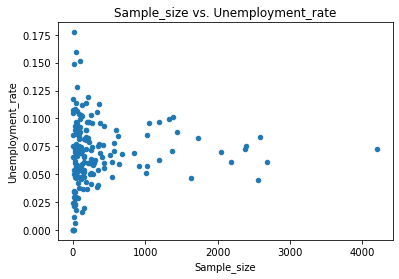

In [20]:
recent_grads.plot(x='Sample_size',
                  y='Unemployment_rate',
                  kind='scatter',
                  title='Sample_size vs. Unemployment_rate')
plt.show()

There is not a correlation between `Sample_size` and `Unemployment_rate`.

***

### - `Full_time` vs. `Median`

- `Full_time` - Number employed 35 hours or more.

- `Median` - Median salary of full-time, year-round workers.

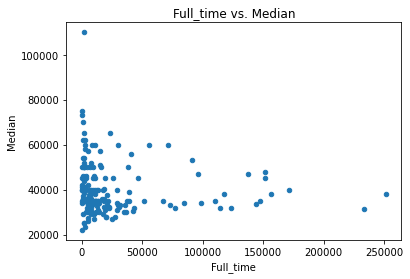

In [21]:
recent_grads.plot(x='Full_time',
                  y='Median',
                  kind='scatter',
                  title='Full_time vs. Median')
plt.show()

There does not appear to be a correlation between `Full_time` and `Median`, the sample size over a year and average full-time earnings.

The smaller the number of people working full-time, the higher the average salary.

<br>

### - `ShareWomen` vs. `Unemployment_rate`

- `ShareWomen` - Women as share of total.

- `Unemployment_rate` - The percentage of the work force that is unemployed at any given date.

In [22]:
recent_grads['Unemployment_rate'].mean() # mean value as reference.

0.06802373423255813

In [23]:
recent_grads['ShareWomen'].mean() # mean value as reference.

0.5222233649593023

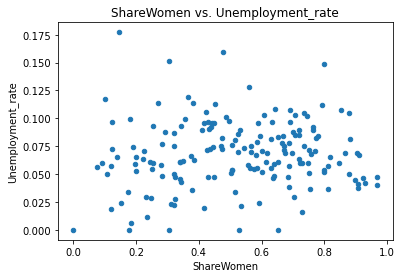

In [24]:
recent_grads.plot(x='ShareWomen',
                  y='Unemployment_rate',
                  kind='scatter',
                  title='ShareWomen vs. Unemployment_rate')

plt.show()

There does not appear to be a correlation between `ShareWomen` and `Unemployment_rate`.



### - `Men` vs. `Median`

- `Men` - Men.

- `Median` - Median earnings of full-time, year-round workers.

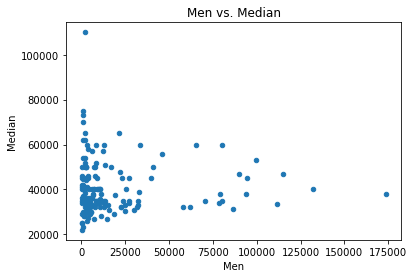

In [25]:
recent_grads.plot(x='Men',
                  y='Median',
                  kind='scatter',
                  title='Men vs. Median')
plt.show()

There does not appear to be a correlation between `Men` and `Median`.

In [26]:
mean_Median = recent_grads['Median'].mean()
mean_Median

40076.74418604651

In [27]:
std_Median = recent_grads['Median'].std() # sample standard deviation over requested axis, avoiding outliers
std_Median

11461.38877329179

The average income of full-time workers throughout the year is a small portion of the total number of working men.


### - `Women` vs `Median`

- `Women` - Women.

- `Median` - Median salary of full-time, year-round workers.

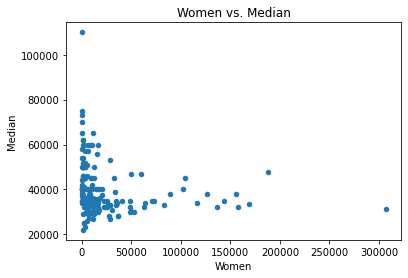

In [28]:
recent_grads.plot(x='Women',
                  y='Median',
                  kind='scatter',
                  title='Women vs. Median')
plt.show()

- The same trend appears to occurs in the graphics of `Women` and `Median`, however we must bear in mind that **the number of women here is greater with respect to the graphics of men** and that will affect the visualization of our graphics.

<br>

What we have done so far is to visualize in a global way the relationships that exist between different columns of our dataset, now we are going to answer the following questions and we will take as a reference some of the answers in which we have worked.


- 1. Do students in more popular majors make more money?

- 2. Do students that majored in subjects that were majority female make more money?

- 3. Is there any link between the number of full-time employees and median salary?

***

<br>

❗ **before proceeding is interesting to have a couple of concepts to understand the values that we will manage.**❗

<br>

***


### Descriptive statistics may us to summarize the **central tendency**, **dispersion** and **shape** of a dataset’s.



<br>


The importance of:

**Location estimation (central tendency):**


So called because they *locate* the most important information, are of great importance in Statistics as a [centralized measures](https://www.vedantu.com/maths/central-measures).

<br>

- **mean** = $\overline{x}$ = $\frac{\sum_{i=1}^n x_i}{n}$
 
<br>
 
**Variability estimation (data dispersion)**


*Measures* the degree of grouping or dispersion of data values, the variation estimate is based on the difference between a location estimation measure such as the mean and the difference from the observed data.

standard deviation, is a robust measure (not affected by extreme values and sensitive to values)

<br>

- **Variance** = ${s}^2$ = $\frac{\sum_{i=n}^n (x_i - \bar{x})^2}{n-1}$

<br>


- **Standard Deviation** = s = $\sqrt[2]{Variance}$


<br>


**Percentile-based estimation (order statistics)**



A different approach to estimating dispersion and focuses on observing the distribution of ordered data. 

el percentil se basa en la ordenación de los elementos de menor a mayor hasta llegar al porcentage que se requiera, en esta caso vienen determinados por el 25% 50% que es la mediana y el 75%:



- $100*$$\frac{j}{n} \le P \ < 100*$$\frac{j+1}{n}$ 


***

<br>

<br>


## - 1. Do students in more popular majors make more money?


<br>

The most popular majors must be the ones with the most people `Total`, so we select the columns that interest us:

- `Major`

- `Total`

- `Median`


#### What is the average salary?

In [29]:
recent_grads['Median'].mean()

40076.74418604651

In [30]:
ten_Popular_majors = recent_grads[['Major','Total','Median','Women','Men']].sort_values(by='Total',ascending=False)[:10]

In [31]:
price_ten_Popular_majors = ten_Popular_majors.sort_values(by='Median', ascending = False )
price_ten_Popular_majors

,Major,Total,Median,Women,Men
34,NURSING,209394.0,48000,187621.0,21773.0
40,ACCOUNTING,198633.0,45000,104114.0,94519.0
57,GENERAL BUSINESS,234590.0,40000,102352.0,132238.0
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,38000,156118.0,173809.0
77,MARKETING AND MARKETING RESEARCH,205211.0,38000,126354.0,78857.0
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,38000,88741.0,93880.0
93,COMMUNICATIONS,213996.0,35000,143377.0,70619.0
123,BIOLOGY,280709.0,33400,168947.0,111762.0
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,32000,136446.0,58227.0
145,PSYCHOLOGY,393735.0,31500,307087.0,86648.0


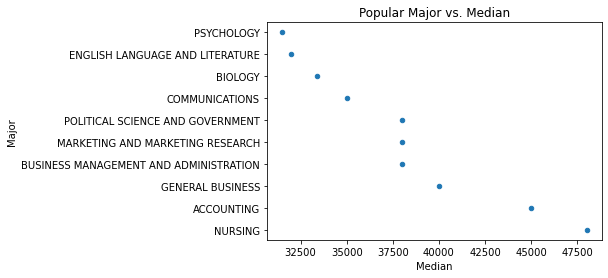

In [32]:
price_ten_Popular_majors.plot(x='Median',
                              y='Major',
                              kind='scatter',
                              title='Popular Major vs. Median', )
plt.show()

### So... do students in more popular majors make more money? 

Yes.😄

Taking into account:

- the average (*centralized measure*) salary is:  \$40076.74\$$  


- the standard deviation (*dispersion measure*) is:  \$11461.3\$$  


Seems that even though the majors are the most popular, salaries seem to fit quite well to the average and dispersion.

<br>

## - 2. Do students that majored in subjects that were majority female make more money?

<br>

The most popular majors must be the ones with the most people `Total`, so we select the columns that interest us:

- `Major`

- `Women`

- `Median`

In [33]:
Woman_majors_money = recent_grads[['Major','Women','Median']].sort_values(by='Women',ascending=False)[:10]

In [34]:
Woman_majors_money_price = Woman_majors_money.sort_values(by='Median',ascending=False)
Woman_majors_money_price

,Major,Women,Median
34,NURSING,187621.0,48000
40,ACCOUNTING,104114.0,45000
76,BUSINESS MANAGEMENT AND ADMINISTRATION,156118.0,38000
77,MARKETING AND MARKETING RESEARCH,126354.0,38000
93,COMMUNICATIONS,143377.0,35000
113,GENERAL EDUCATION,116825.0,34000
123,BIOLOGY,168947.0,33400
138,ELEMENTARY EDUCATION,157833.0,32000
137,ENGLISH LANGUAGE AND LITERATURE,136446.0,32000
145,PSYCHOLOGY,307087.0,31500


#### The question seems refer to compare what women earn with men so we will have to know what men earn.

In [35]:
Men_majors_money = recent_grads[['Major','Men','Median']].sort_values(by='Men',ascending=False)[:10]

In [36]:
Men_majors_money_price = Men_majors_money.sort_values(by='Median',ascending=False)
Men_majors_money_price

,Major,Men,Median
8,MECHANICAL ENGINEERING,80320.0,60000
20,COMPUTER SCIENCE,99743.0,53000
35,FINANCE,115030.0,47000
36,ECONOMICS,89749.0,47000
40,ACCOUNTING,94519.0,45000
57,GENERAL BUSINESS,132238.0,40000
76,BUSINESS MANAGEMENT AND ADMINISTRATION,173809.0,38000
78,POLITICAL SCIENCE AND GOVERNMENT,93880.0,38000
123,BIOLOGY,111762.0,33400
145,PSYCHOLOGY,86648.0,31500


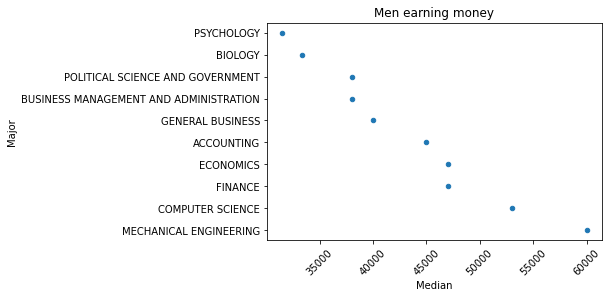

In [37]:
Men_majors_money_price.plot(x='Median',
                      y='Major',
                      kind='scatter',
                      title='Men earning money',rot = 45 )
plt.show()

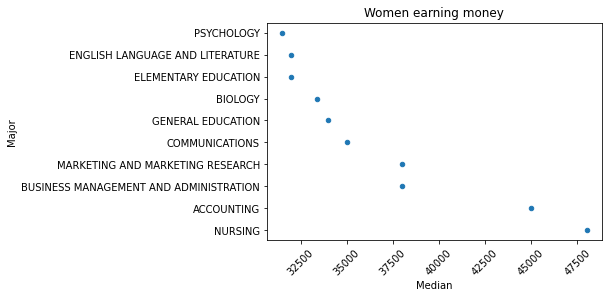

In [38]:
Woman_majors_money_price.plot(x='Median',
                        y='Major',
                        kind='scatter',
                        title='Women earning money',rot = 45 )
plt.show()

### Common major sorted by genres.

In [39]:
major_men_women = recent_grads[['Major','Men','Women']].sort_values(by='Men',ascending=False)[:10]
major_men_women 

,Major,Men,Women
76,BUSINESS MANAGEMENT AND ADMINISTRATION,173809.0,156118.0
57,GENERAL BUSINESS,132238.0,102352.0
35,FINANCE,115030.0,59476.0
123,BIOLOGY,111762.0,168947.0
20,COMPUTER SCIENCE,99743.0,28576.0
40,ACCOUNTING,94519.0,104114.0
78,POLITICAL SCIENCE AND GOVERNMENT,93880.0,88741.0
36,ECONOMICS,89749.0,49498.0
145,PSYCHOLOGY,86648.0,307087.0
8,MECHANICAL ENGINEERING,80320.0,10907.0


In [40]:
major_men_women['Men'].mean()

107769.8

In [41]:
major_men_women['Men'].std()

27860.421675838927

### -(-2.) Do students that majored in subjects that were majority female make more money?

#### ...no

## -3. Is there any link between the number of full-time employees and median salary?

*It is preferable to visualize the graph again*


- `Full_time` - Number employed 35 hours or more.

- `Median` - Median salary of full-time, year-round workers.

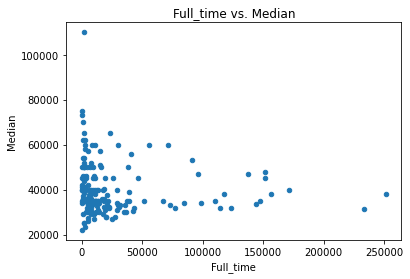

In [42]:
recent_grads.plot(x='Full_time',
                  y='Median',
                  kind='scatter',
                  title='Full_time vs. Median')
plt.show()

There does not appear to be a correlation between `Full_time` and `Median`, therefore what we can see is that **the amount of money you can earn is not related to time invested into the work**.

***

## Data and Histograms

Because the **data that we are going to handle are quantitative (just numbers)**, the ideal in this case is to use a **histogram**.

A histogram shows the shape of the values, or distribution, of a continuous variable.

Histograms help you see the center, extent, and shape of a dataset. They can also be used as a visual tool to check normality.


A way to do an exploratory analysis and observe the relationships of the data to be analyzed.

<br>

In [43]:
cols = ["Sample_size",
        "Median",
        "Employed",
        "Full_time", 
        "ShareWomen", 
        "Unemployment_rate", 
        "Men", 
        "Women"]

### Sample size (unweighted) of full-time.

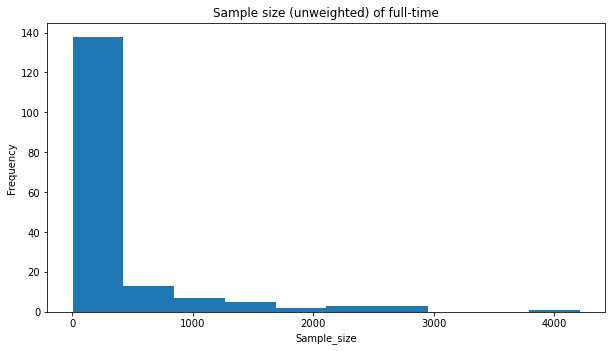

In [44]:
fig = plt.figure(figsize=(10,50))

data = 0 # Sample size (unweighted) of full-time.

col_name = cols[data]
ax = fig.add_subplot(len(cols),1,data+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0)

ax.set_xlabel(col_name, rotation = 0) 
plt.title('Sample size (unweighted) of full-time')
plt.show()

The histogram informs us that the **highest frequency** of our full-time sample size set (sample size of full time year round only) is the **samples with a low value**.

<br>

### Median salary of full-time, year-round workers.

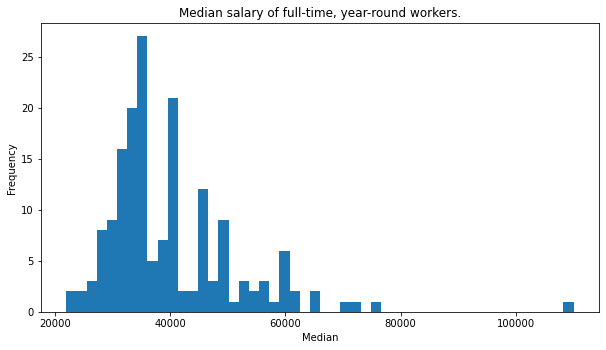

In [45]:
fig = plt.figure(figsize=(10,50))

data = 1 # Median salary of full-time, year-round workers.

col_name = cols[data]
ax = fig.add_subplot(len(cols),1,data+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)

ax.set_xlabel(col_name, rotation = 0) 
plt.title('Median salary of full-time, year-round workers.')
plt.show()

In this case we see that the amount salary is repeated (the frequency) of `Median` salary of full-time, year-round workers. 

Previously we saw:

- average salary is:  \$40076.74$\$ 


- standard deviation (std) is:  \$11461.3$\$ 


It seems that values make sense.

<br>

### Number employed.

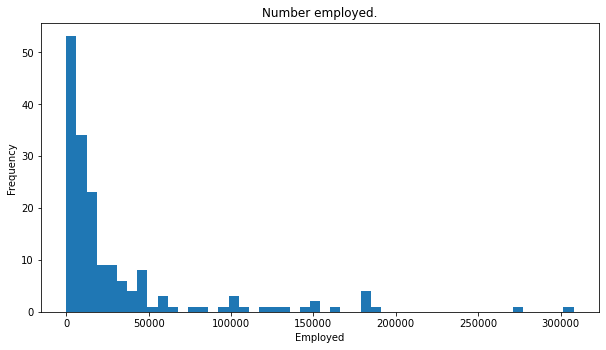

In [46]:
fig = plt.figure(figsize=(10,50))

data = 2 # Number employed.

col_name = cols[data]
ax = fig.add_subplot(len(cols),1,data+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)

ax.set_xlabel(col_name, rotation = 0)
plt.title('Number employed.')
plt.show()

This is a skewed distribution:

- In the case of the casual histogram, the values pile up toward the starting point of the range.


- Values decrease in frequency towards the opposite end, forming the **tail of the distribution**.


- Therefore the higher frequency of number of `Employed` is quite low.

<br>

### Number employed 35 hours or more

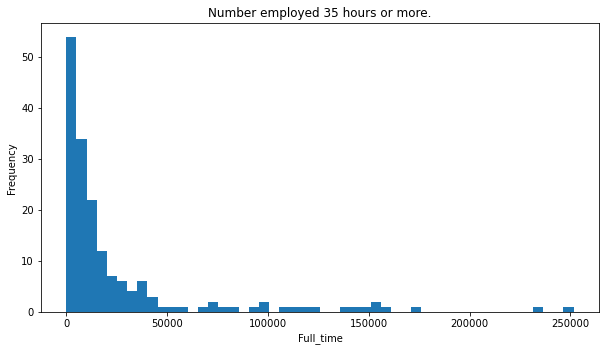

In [47]:
fig = plt.figure(figsize=(10,50))

data = 3 # Full_time

col_name = cols[data]
ax = fig.add_subplot(len(cols),1,data+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)

ax.set_xlabel(col_name, rotation = 0) 
plt.title('Number employed 35 hours or more.')
plt.show()

The same goes for full-time jobs, the pattern of the graph above is repeated.

### Women as share of total.

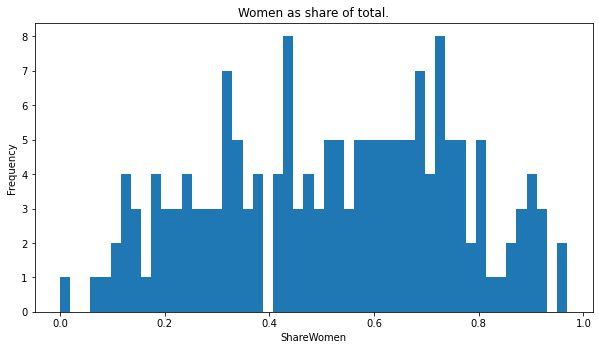

In [48]:
fig = plt.figure(figsize=(10,50))

data = 4 # Women as share of total.

col_name = cols[data]
ax = fig.add_subplot(len(cols),1,data+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)

ax.set_xlabel(col_name, rotation = 0) 
plt.title('Women as share of total.')
plt.show()

We can see that `ShareWomen` distribution is homogeneous in the dataset.

### Men as share of total.

I wanted to check how the share of men was

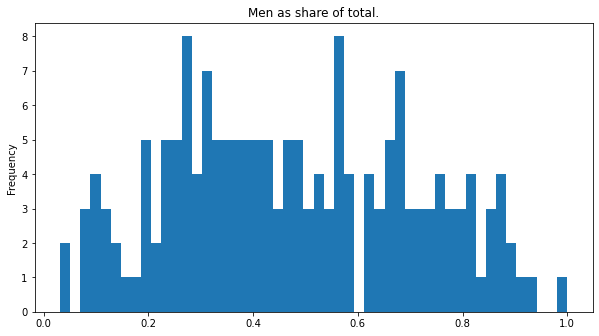

In [49]:
recent_grads['share_man'] = recent_grads['Men'] / recent_grads['Total']  

fig = plt.figure(figsize=(10,50))
ax = fig.add_subplot(len(cols),1,data+1)

ax = recent_grads['share_man'].plot(kind='hist', rot=0, bins = 50)
plt.title('Men as share of total.')
plt.show()

The distribution is equally homogeneous as well.


### Percentage of the work force that is unemployed at any given date

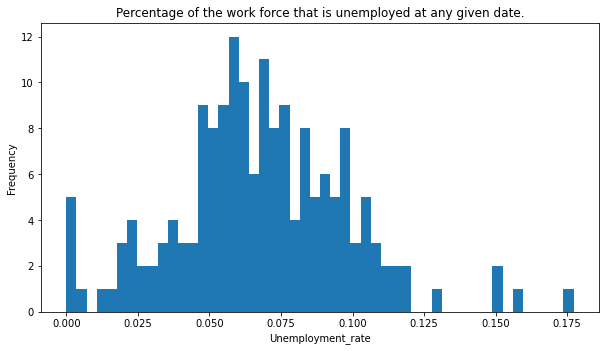

In [50]:
fig = plt.figure(figsize=(10,50))

data = 5 # Percentage of the work force that is unemployed at any given date

col_name = cols[data]
ax = fig.add_subplot(len(cols),1,data+1)
ax = recent_grads[col_name].plot(kind='hist', rot=0, bins = 50)

ax.set_xlabel(col_name, rotation = 0) 
plt.title('Percentage of the work force that is unemployed at any given date.')
plt.show()

The `unemployment_rate` tells us that the number of unemployed is almost more than of half.

### Comparison of history between men and women.


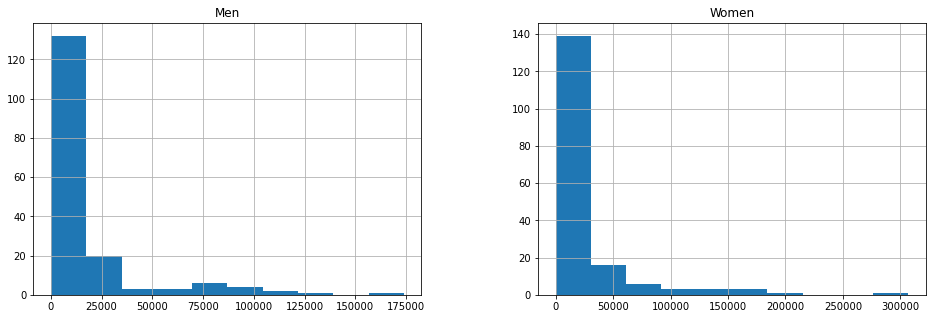

In [51]:
fig,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(16,5))

recent_grads.hist(column="Men", ax=ax1,  label= "Men")
recent_grads.hist(column="Women", ax=ax2,  label= "Women")

plt.show()

We can observe that the shape is similar but the volume (x axis) is greater for women, so it means that the number of women graduates exceeds almost the double the number of mens.


## Using histograms

### - 2. How many majors are predominantly male? 

We can visualize throughout the dataset whether or not there are differences between the different genres

In [52]:
majors_male = recent_grads.loc[:,['Men','Major']].sort_values( by='Men', ascending = False)
majors_male = majors_male[:10]
majors_male.sort_values( by='Men', ascending = False)

,Men,Major
76,173809.0,BUSINESS MANAGEMENT AND ADMINISTRATION
57,132238.0,GENERAL BUSINESS
35,115030.0,FINANCE
123,111762.0,BIOLOGY
20,99743.0,COMPUTER SCIENCE
40,94519.0,ACCOUNTING
78,93880.0,POLITICAL SCIENCE AND GOVERNMENT
36,89749.0,ECONOMICS
145,86648.0,PSYCHOLOGY
8,80320.0,MECHANICAL ENGINEERING


In [53]:
majors_male['Men'].value_counts(bins = 10, ascending = True).sort_index()

(80226.51, 89668.9]     2
(89668.9, 99017.8]      3
(99017.8, 108366.7]     1
(108366.7, 117715.6]    2
(117715.6, 127064.5]    0
(127064.5, 136413.4]    1
(136413.4, 145762.3]    0
(145762.3, 155111.2]    0
(155111.2, 164460.1]    0
(164460.1, 173809.0]    1
Name: Men, dtype: int64

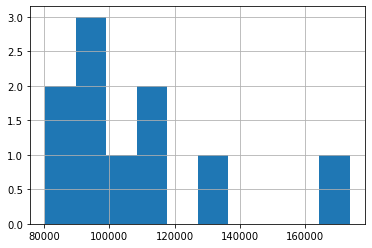

In [54]:
majors_male['Men'].hist()

Majors are predominantly male:

- BUSINESS MANAGEMENT AND ADMINISTRATION
- GENERAL BUSINESS
- FINANCE
- BIOLOGY
- COMPUTER SCIENCE
- ACCOUNTING
- POLITICAL SCIENCE AND GOVERNMENT
- ECONOMICS
- PSYCHOLOGY
- MECHANICAL ENGINEERING

### - 2. How many majors are predominantly female?

In [55]:
majors_female = recent_grads.loc[:,['Women','Major']].sort_values( by='Women', ascending = False)
majors_female = majors_female[:10]
majors_female.sort_values( by='Women', ascending = False)

,Women,Major
145,307087.0,PSYCHOLOGY
34,187621.0,NURSING
123,168947.0,BIOLOGY
138,157833.0,ELEMENTARY EDUCATION
76,156118.0,BUSINESS MANAGEMENT AND ADMINISTRATION
93,143377.0,COMMUNICATIONS
137,136446.0,ENGLISH LANGUAGE AND LITERATURE
77,126354.0,MARKETING AND MARKETING RESEARCH
113,116825.0,GENERAL EDUCATION
40,104114.0,ACCOUNTING


In [56]:
majors_female['Women'].value_counts(bins = 10, ascending = True).sort_index()

(103911.026, 124411.3]    2
(124411.3, 144708.6]      3
(144708.6, 165005.9]      2
(165005.9, 185303.2]      1
(185303.2, 205600.5]      1
(205600.5, 225897.8]      0
(225897.8, 246195.1]      0
(246195.1, 266492.4]      0
(266492.4, 286789.7]      0
(286789.7, 307087.0]      1
Name: Women, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb587bc3df0>]],
      dtype=object)

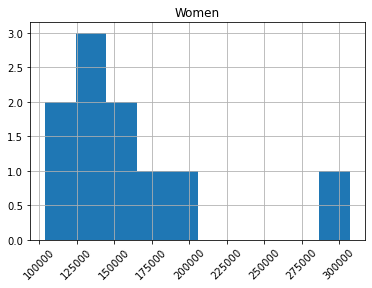

In [57]:
majors_female.hist(xrot=45)

Majors are predominantly female:

- PSYCHOLOGY
- NURSING
- BIOLOGY
- ELEMENTARY EDUCATION
- BUSINESS MANAGEMENT AND ADMINISTRATION
- COMMUNICATIONS
- ENGLISH LANGUAGE AND LITERATURE
- MARKETING AND MARKETING RESEARCH
- GENERAL EDUCATION
- ACCOUNTING


## Using bar plots

### -3. Which category of majors have the most students?

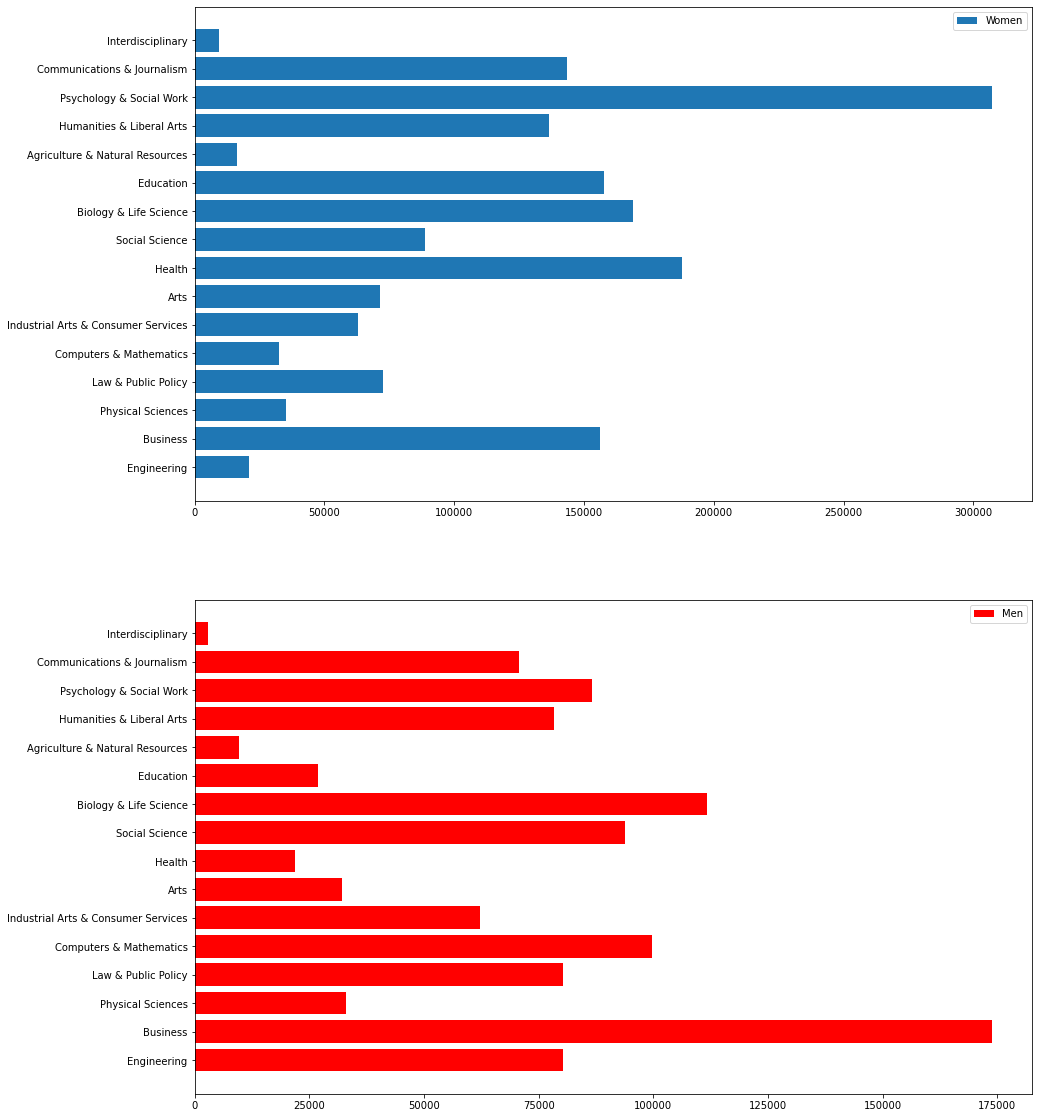

In [58]:
fig = plt.figure(figsize=(15,20))



plt.subplot(2,1,1)

plt.barh(recent_grads['Major_category'],recent_grads['Women'], label= "Women")
plt.legend()



plt.subplot(2,1,2)

plt.barh(recent_grads['Major_category'],recent_grads['Men'], label= "Men",color = 'red')
plt.legend()
plt.show()

<br>

Quickly we observe that **women surpass men** and that these are more focused on fields other than men.

<br>

In [59]:
max_value = recent_grads["Men"].max() 
max_value # max number of Men.

173809.0

In [60]:
max_men_value_bool = recent_grads["Men"] == max_value

Through Boolean filtering we obtain which is the most chosen career category

In [61]:
M_final_col = ["Major_category"]
M_final_col

['Major_category']

In [62]:
result = recent_grads.loc[max_men_value_bool,M_final_col]
result

,Major_category
76,Business


### ... and majors predominantly female?

In [63]:
max_value = recent_grads["Women"].max() 
max_value

307087.0

In [64]:
max_value_bool = recent_grads["Women"] == max_value
#max_value_bool.unique() # boolean filter

In [65]:
W_final_col = ["Major_category"]
W_final_col

['Major_category']

In [66]:
result = recent_grads.loc[max_value_bool,W_final_col]
result

,Major_category
145,Psychology & Social Work


### - 2. How many majors are predominantly male?

#### Answer:

As we have seen, the answer is precisely the opposite of the question, since it is women who predominate over men, and in other types of majors.

##### In this table we can see the relationship of bachelor's degrees by gender and the number of people who are in them.

|Genre|Mayor category|# people|
|:--|:--|:--|
|Men|Business|173809.0|
|Women|Psychology & Social Work|307087.0|


...as we had already seen in the histograms


<br>

### Lists by genre and `Major_category` , `Majors` and `Unemployed`.

### `Men`

In [67]:
recent_grads.loc[:,['Men','Major_category','Major','Unemployed']].sort_values(by='Unemployed', ascending = False)[:10]

,Men,Major_category,Major,Unemployed
145,86648.0,Psychology & Social Work,PSYCHOLOGY,28169
76,173809.0,Business,BUSINESS MANAGEMENT AND ADMINISTRATION,21502
78,93880.0,Social Science,POLITICAL SCIENCE AND GOVERNMENT,15022
57,132238.0,Business,GENERAL BUSINESS,14946
93,70619.0,Communications & Journalism,COMMUNICATIONS,14602
137,58227.0,Humanities & Liberal Arts,ENGLISH LANGUAGE AND LITERATURE,14345
123,111762.0,Biology & Life Science,BIOLOGY,13874
40,94519.0,Business,ACCOUNTING,12411
77,78857.0,Business,MARKETING AND MARKETING RESEARCH,11663
36,89749.0,Social Science,ECONOMICS,11452


- Ten rows sorted by unemployment showing unemployment.

### Scatter plot of  `Men` `Major` and `Unemployed`

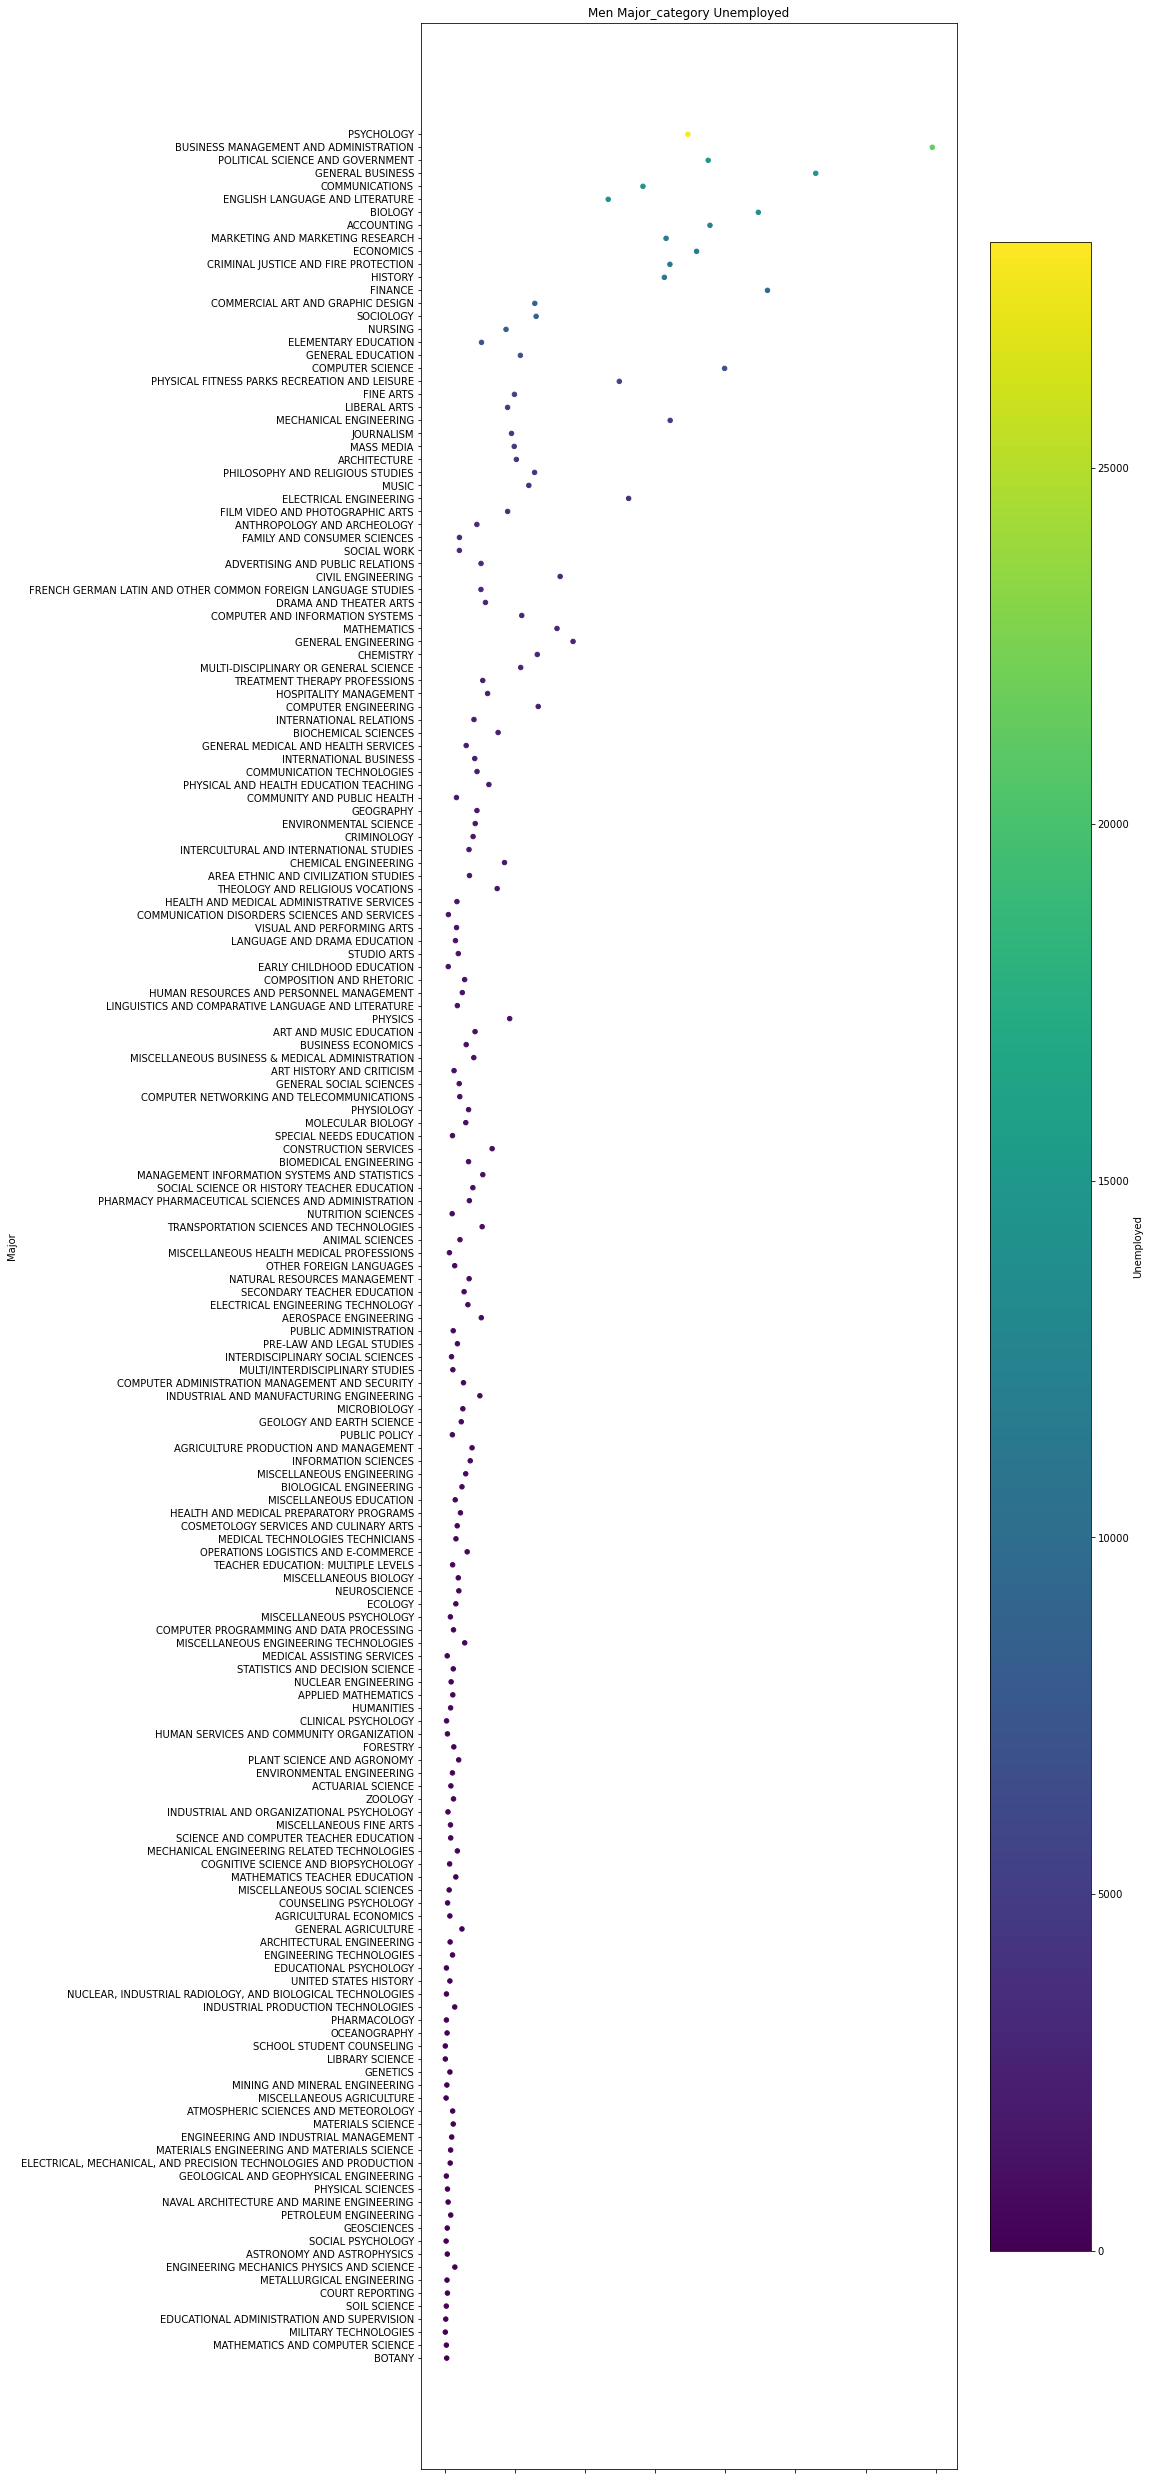

In [68]:
xxx = recent_grads.loc[:,['Men','Major','Unemployed']].sort_values( by='Unemployed', ascending = True)
xxx.plot(x='Men',
         y='Major',
         c='Unemployed',
         colormap='viridis',
         kind='scatter',
         title='Men Major_category Unemployed',
         figsize=(12,45),
         xlabel ='Men')

plt.show()

-Unemployment describes the contour of a logarithmic function.



<img src="csv/plot_log.png" alt="plot_log" width="400"/>

<br>


*...this is an approximate function:* $172+\ 75\cdot\log\left(x\right)$


### Scatter plot by genre,  `Major_category` and `Unemployed`.

#### `Men`

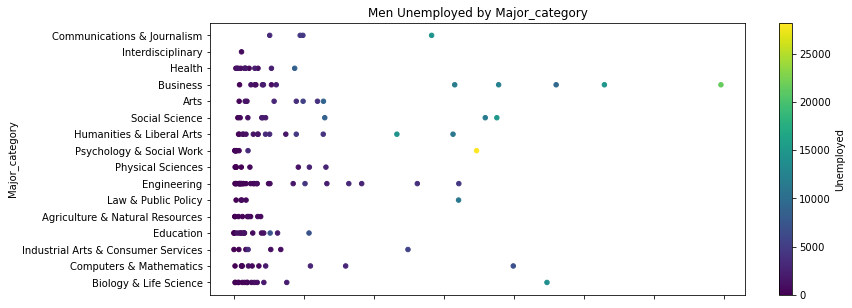

In [69]:
xxx = recent_grads.loc[:,['Men','Major_category','Unemployed']].sort_values( by='Unemployed', ascending = True)
xxx.plot(x='Men',
         y='Major_category',
         c='Unemployed',
         colormap='viridis',
         kind='scatter',
         title='Men Unemployed by Major_category',
         figsize=(12,5),
         xlabel ='Men')

plt.show()

### Lists by genre and `Major_category` and  `Major` .

#### `Women`

In [70]:
recent_grads.loc[:,['Women','Major_category','Major','Unemployed']].sort_values(by='Unemployed', ascending = False)[:10]

,Women,Major_category,Major,Unemployed
145,307087.0,Psychology & Social Work,PSYCHOLOGY,28169
76,156118.0,Business,BUSINESS MANAGEMENT AND ADMINISTRATION,21502
78,88741.0,Social Science,POLITICAL SCIENCE AND GOVERNMENT,15022
57,102352.0,Business,GENERAL BUSINESS,14946
93,143377.0,Communications & Journalism,COMMUNICATIONS,14602
137,136446.0,Humanities & Liberal Arts,ENGLISH LANGUAGE AND LITERATURE,14345
123,168947.0,Biology & Life Science,BIOLOGY,13874
40,104114.0,Business,ACCOUNTING,12411
77,126354.0,Business,MARKETING AND MARKETING RESEARCH,11663
36,49498.0,Social Science,ECONOMICS,11452


### Scatter plot of Women `Major` and `Unemployed`

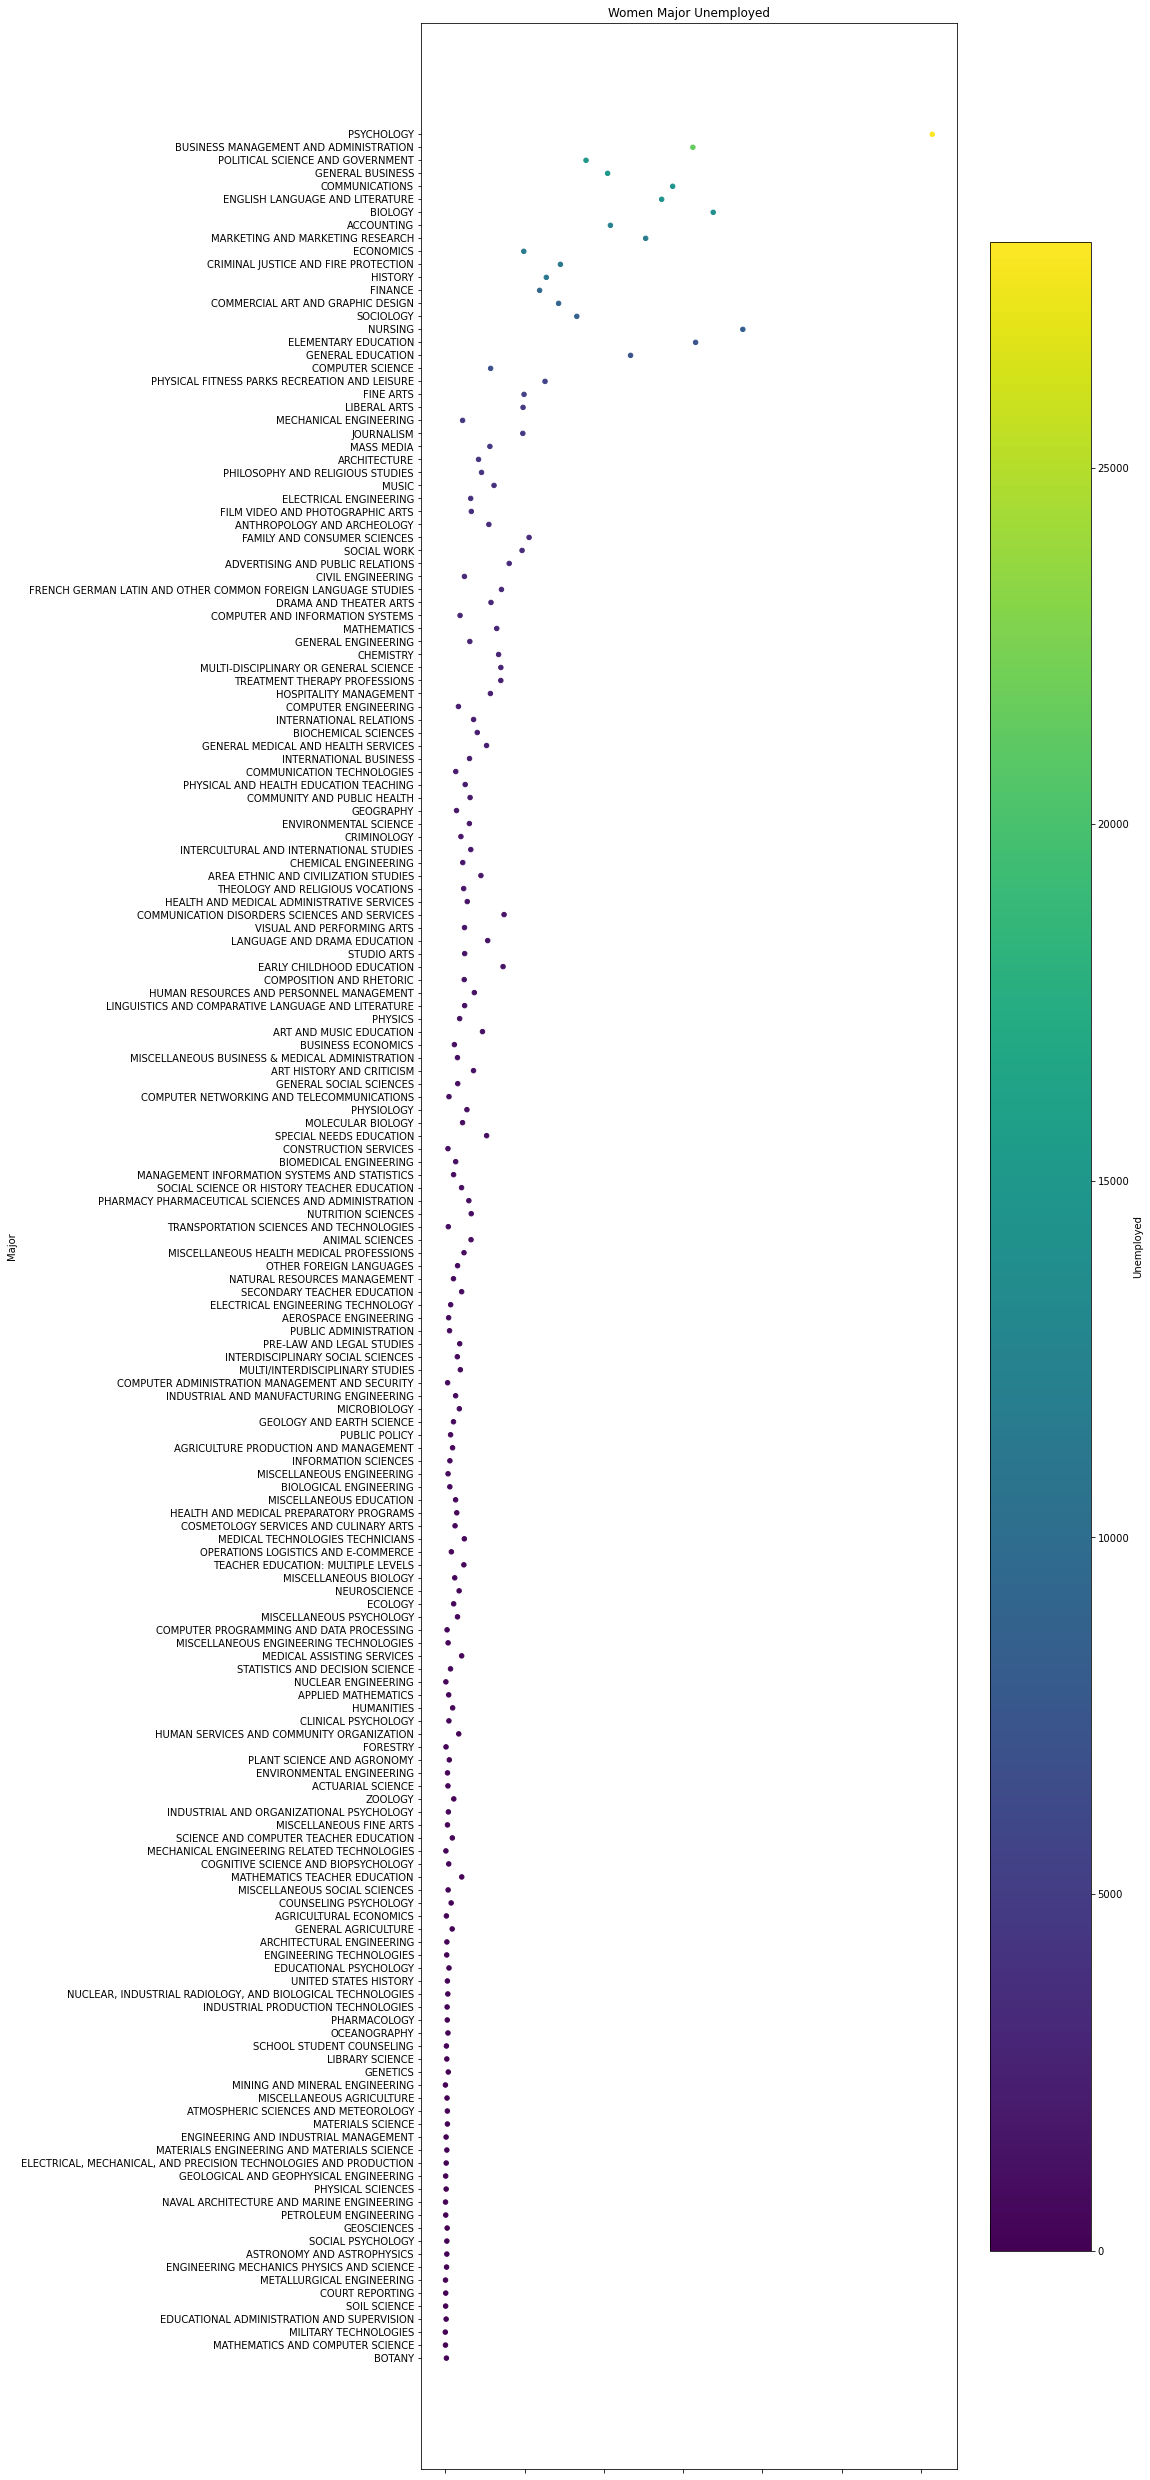

In [71]:
xxx = recent_grads.loc[:,['Women','Major','Unemployed']].sort_values( by='Unemployed', ascending = True)
xxx.plot(x='Women',
         y='Major',
         c='Unemployed',
         colormap='viridis',
         kind='scatter',
         title='Women Major Unemployed',
         figsize=(12,45),
         xlabel ='Women')

plt.show()

As a difference, the nuance lies in the fact that the curve is not so pronounced.


$172+95\cdot\log\left(x\right)$

<img src="csv/wplot_log.png" alt="wplot_log" width="400"/>

<br>

This "nuance" is very important since it indicates that there is a **lower trend towards unemployment among women**.

<br>

### Scatter plot by genre,  `Major_category` and `Unemployed`.

#### `Women`

In [ ]:
xxx = recent_grads.loc[:,['Women','Major_category','Unemployed']].sort_values( by='Unemployed', ascending = True)
xxx.plot(x='Women',
         y='Major_category',
         c='Unemployed',
         colormap='viridis',
         kind='scatter',
         title='Women Unemployed by Major_category ',
         figsize=(12,5),
         xlabel ='Women')

plt.show()

***

### Using grouped bar chart by `Major category` and `Major`

#### Comparing men with women in each specialization category.

In [ ]:
carreras = recent_grads['Major_category'].unique()
carreras # carreras means majors, just for avoiding mistakes.

In [ ]:
# creating all mayor plots

for carrera in range(len(carreras)): # get len
    
    serie_bool = recent_grads["Major_category"] == carreras[carrera]
    
    f, ax = plt.subplots(figsize=(20,9)) # set the size that you'd like (width, height)
    
    y1 = list(recent_grads.loc[serie_bool,"Women"])
    y2 = list(recent_grads.loc[serie_bool,"Men"]) 

    texto = recent_grads.loc[serie_bool,"Major"] 
    x = np.arange(len(texto))

    width = 0.2

    # plot data in grouped manner of bar type
    
    plt.bar(x-0.2, y1, width, color='green')
    plt.bar(x, y2, width, color='orange')

    plt.xticks(x, recent_grads.loc[serie_bool,"Major"], rotation = 90)
    plt.title(carreras[carrera], fontsize = 16)
    plt.ylabel("Students")
    plt.legend(['Women', 'Men'], fontsize = 14)
    plt.show()

### `Pandas` Scatter matrix:

Because scatter matrix plots are frequently used in the exploratory data analysis.

In [ ]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(8,8))
plt.show()

This way of graphing allows us:



In [ ]:
scatter_matrix(recent_grads[['Men', 'Women', 'Unemployment_rate']], figsize=(10,10))
plt.show()

#### observations:

- apparently the graphs are quite balanced without being able to highlight anything new to what has already been said.

### Box plot.

Exploring distributions of average wages `Median` and the `Unemployment_rate`.

The main feature of the box and whisker diagram is that it allows you to quickly visualize the dispersion of a series of data, since it indicates the quartiles, median, extreme values and outliers of the data.

Box and whisker diagrams are very useful for comparing numerical variables. However, it is not suitable for representing categorical variables.

The box and whisker diagram is used to analyze the symmetry of the statistical sample, as it represents the entire data set visually. **If the median is not in the center of the box**, it means that the sample is not symmetrical.

Notches are drawn inside the squares representing the 95% **confidence intervals** for the median. 

**The confidence interval** will allow us to calculate two values around a sample mean (one upper and one lower). These values will limit a range within which, with a certain probability, the population parameter will be located. 

It will serve to give us an approximate idea of what the true of this could be, in this case to know between what values the average salary is located.

With these notches we can assess whether the differences between two variables are significant if the notches do not overlap between the two variables.

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))

recent_grads.boxplot(column="Median", ax=ax1, showfliers = False, notch = True, autorange = True)
recent_grads.boxplot(column="Unemployment_rate", ax=ax2, showfliers = False, notch = True, autorange = True)
plt.show()

#### The box description:

- The first and third quartiles (Q1(0.25) and Q3(0.75))


- The vertical line inside the box is the median (equivalent to the second quartile Q2)

- The limits of the whiskers (or arms) are the extreme values, that is, the minimum value and the maximum value of the data series.


- The points outside the whiskers are the outliers, or in other words, data that have probably been poorly measured and therefore should not be taken into account in the statistical study.


- The difference between the third and first quartile is the interquartile range (or interquartile range), another measure of statistical dispersion.

#### `Median`

In [ ]:
recent_grads['Median'].quantile([0.25, 0.5, 0.75])

In [ ]:
recent_grads['Median'].std()

Therefore the salaries is:

- 25% 33000  

- 50% 36000

- 75% 45000. 


The salary trend despite being a narrow value band has possibilities to grow.



#### `Unemployment_rate` 

In [ ]:
recent_grads['Unemployment_rate'].max()

In [ ]:
recent_grads['Unemployment_rate'].quantile([0.25, 0.5, 0.75])

The value of unemployment is high, and the graph is symmetrical indicating that there is no growing or decreasing trend.


### Ploting of the number of jobs sorted by careers and gender.


#### `men`


Number of rows `172`, minus the number of results we want `10` is the value we must insert, `152`

In [ ]:
recent_grads.sort_values(by='Men')[162:].plot.barh(x='Major', y='Men', figsize=(5,5), title = 'majors with more men')
plt.show()

In [ ]:
recent_grads.sort_values(by='Men')[:10].plot.barh(x='Major', y='Men',figsize=(5,5), title = 'majors with less men')
plt.show()

#### `women`

In [ ]:
recent_grads.sort_values(by='Women')[162:].plot.barh(x='Major', y='Women', figsize=(5,5), title = 'majors with more women')
plt.show()

In [ ]:
recent_grads.sort_values(by='Women')[:10].plot.barh(x='Major', y='Women', figsize=(5,5), title = 'majors with less women')
plt.show()

### Comparing percentages of women (`ShareWomen`) from the first ten rows and last ten rows.

In [ ]:
plt.figure(figsize=(8,10))

plt.subplot(3,1,1)
#recent_grads[:5].plot.bar(x='Major', y='ShareWomen')
plt.barh(recent_grads['Major_category'].sort_values()[-10:],recent_grads['ShareWomen'].sort_values()[-10:])
plt.title("Group of first ten rows ")


plt.subplot(3,1,2)
plt.barh(recent_grads['Major'].sort_values()[-10:],recent_grads['ShareWomen'].sort_values()[-10:])
plt.title("first ten rows ")


plt.subplot(3,1,3)

plt.barh(recent_grads['Major'].sort_values()[:10],recent_grads['ShareWomen'].sort_values()[:10])
plt.title("last ten rows ")

plt.show()

#### last ten rows. 

 ### Comparing percentages of `Unemployment_rate`  from the first ten rows and last ten rows.

In [ ]:
plt.figure(figsize=(8,10))

plt.subplot(3,1,1)
#recent_grads[:5].plot.bar(x='Major', y='ShareWomen')
plt.barh(recent_grads['Major_category'].sort_values()[-10:],recent_grads['Unemployment_rate'].sort_values()[-10:])
plt.title("Group of first ten rows ")


plt.subplot(3,1,2)
plt.barh(recent_grads['Major'].sort_values()[-10:],recent_grads['Unemployment_rate'].sort_values()[-10:])
plt.title("first ten rows ")


plt.subplot(3,1,3)

plt.barh(recent_grads['Major'].sort_values()[:10],recent_grads['Unemployment_rate'].sort_values()[:10])
plt.title("last ten rows ")

plt.show()


### Using hexagonal bin plot

When we wish to analyze truly massive datasets, however, scatterplots’ value can be limited because of a problem known as overplotting.  


Overplotting is the result of too many data points landing atop one another, thereby rendering many of the individual points indistinguishable.  While there are several approaches that can be taken to address this issue (among these are jittering, transparency adjustments, scale adjustments, and sampling), 

The scatterplot shows us a greater concentration of data points, but it doesn’t tell us anything about the relative concentration of points in particular place.

 Each hexagon is equally-sized, and a color gradient is used to indicate the density of data points that fall inside each hexagon.  

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,8))

boolean_filter = recent_grads['Men'] <= 50000
men_filter = recent_grads[boolean_filter].copy()

men_filter.plot.hexbin(ax=ax1,x='Men', y='Median',gridsize=15,cmap="viridis",figsize=(14,8))



boolean_filter = recent_grads['Women'] <= 50000
women_filter = recent_grads[boolean_filter].copy()

women_filter.plot.hexbin(ax=ax2, x='Women', y='Median',gridsize=15,cmap="viridis",figsize=(18,8))
plt.show()

The sample has been limited to a figure less than or equal to **50000**, to match the samples and have greater detail.

#### Observations:

- It can be seen that the highest salary in the group of men is lower than that of women.

- Although women have a higher salary, it is not as distributed as in the case of men.

In [ ]:
%%html
<style>
table {float:left}
</style>

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(12,7))

boolean_employ = recent_grads['Employed'] <= 50000
filter_employ = recent_grads[boolean_employ]

filter_employ.plot.hexbin(ax=ax1,x='Employed', y='Sample_size',gridsize=15,cmap="viridis",figsize=(14,8), rot=45)
recent_grads.plot.hexbin(ax=ax2, x='Median', y='Sample_size',gridsize=15,cmap="viridis",figsize=(18,8))

recent_grads.plot.hexbin(ax=ax3, x='Unemployment_rate', y='Sample_size',gridsize=15,cmap="viridis",figsize=(18,8))

plt.show()

The sample has been limited to a figure less than or equal to **50000**, to match the samples and have greater detail.

#### Observations:

- `Sample_size - Unemployment_rate:` Previously we saw in scatterplot that there was a correlation between Sample size and Employed, however we can see with much more clarity is that this correlation is weaker as the number of samples increases and the number of employees increases.

- `Sample_size - Unemployment_rate:` We already saw that there was no correlation between these two dimensions, however a small number of samples, that is to say that few people are working have an average salary value of 30000 dollars, that we saw before.


- `Sample_size - Median:` Of the total samples there is a fairly high amount of unemployment.

<br>

### summary of the facts collected:

- We have 16 categories of Majors.


- The amount of women is higher than men.


- Up to 25% of all majors are mainly men, the rest are women.


- There appears to be a positive but very weak correlation between sample size and employment.


- There is no correlation between a high wage and the number of hours worked.


- Students in popular careers in the event that they have a job have a pretty good salary the average salary is:  $40076.74$\$.


- Women are in 75% of the categories of the largest.


- Mens earn more money, they work in higher-paying sectors with fewer students.



- The `unemployment_rate` tells us that the number of unemployed is almost half.



- There is a positive correlation between the number of samples in the dataset and the number of people employed. 


- The highest rank in the average salary is found with a small number of samples. 


- A small number of people who work 35 hours are those who get the highest salary range. 


- The unemployment ratio in the quota of men and women is almost half. 


- Few men in the total have access to the full spectrum of salaries, also women.


- Few women in the total have access to the full spectrum of salaries Students in the most popular careers earn money the worst paid is psychology the one that is in the average is general business the best paid is nursing


- Women earn less than men, however men who earn more are a minority since the majors in which they earn more money are precisely those that are not popular sorted according to money.


- There does not appear to be a correlation between `Full_time` and `Median`, therefore what we can see is that the amount of money earnt is not related to time invested into the work.



#### Category of majors by genre.

|Major_category|Genre|
|:---|---|
|'Engineering'| Men |
|'Business'| Men|
|'Physical Sciences'|Women |
|'Law & Public Policy'| Women|
|'Computers & Mathematics'| Men|
|'Agriculture & Natural Resources'| Women|
|'Industrial Arts & Consumer Services'| Women|
|'Arts'|Women |
|'Health'| Women|
|'Social Science'|Men |
|'Biology & Life Science'| Women|
|'Education'|Women |
|'Humanities & Liberal Arts'| Women|
|'Psychology & Social Work'| Women|
|'Communications & Journalism'|Women |
|'Interdisciplinary'| Women|

## Conclusions: 


<br>

- Working students are generally well paid.


- Men are in quantity 25% of the total and only are most in 4 of the largest categories.

- Mechanical engineering is where it pays the most of all the careers and is precisely the lowest of the ten selected by men, therefore those men who earn the most are a minority within the total and within the group of men.

- Unemployment its quite important but seems to be balanced between genres.



- There is a population of men who have a lower average salary although similar, however women have the average salary not so distributed and being higher is concentrated in a smaller area, which we can see in the hexagonal plot of containers.

as a consequence of what we have seen so far I have no doubt that this will have a very important impact on all levels of future society.




*** 

<br>

http://datablogcafe.com/